## Pandas加载数据

In [1]:
import pandas as pd

### 数据读取与保存

#### TXT数据

In [2]:
pd.read_csv("data/iris.txt", sep="\t")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


自定义表头

In [3]:
pd.read_csv("data/iris.txt", sep="\t", header=None, names=["s_length", "s_width", "p_length", "p_width", "class"])

,s_length,s_width,p_length,p_width,class
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3,5.2,2.3,Iris-virginica
147,6.3,2.5,5,1.9,Iris-virginica
148,6.5,3,5.2,2,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


#### CSV数据
和TXT数据同理

In [4]:
pd.read_csv("data/iris.csv")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### XLS数据

In [5]:
pd.read_excel("data/iris.xls")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### SQL数据
需要用到另外一个库，SQLAlchemy

In [6]:
import numpy as np
from sqlalchemy import create_engine

frame = pd.DataFrame(np.arange(20).reshape(4, 5), columns=['white', 'red', 'blue', 'green', 'yellow'])
engine = create_engine('sqlite:///data/test.db')
frame.to_sql('colors', engine, if_exists='replace') # 保存数据库中名为colors的表
frame = pd.read_sql('colors', engine) # 读取数据库中名为colors的表
print(frame.head())

   index  white  red  blue  green  yellow
0      0      0    1     2      3       4
1      1      5    6     7      8       9
2      2     10   11    12     13      14
3      3     15   16    17     18      19


### 数据特征分析

#### 描述性统计
其中，`std` 指的是标准差

In [7]:
iris = pd.read_csv("data/iris.csv")
iris.head()
iris.tail()
print(iris.shape)
print(iris.info())
print(iris.describe())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

#### 分布分析

##### 散点图

(150, 4)
['setosa' 'versicolor' 'virginica']


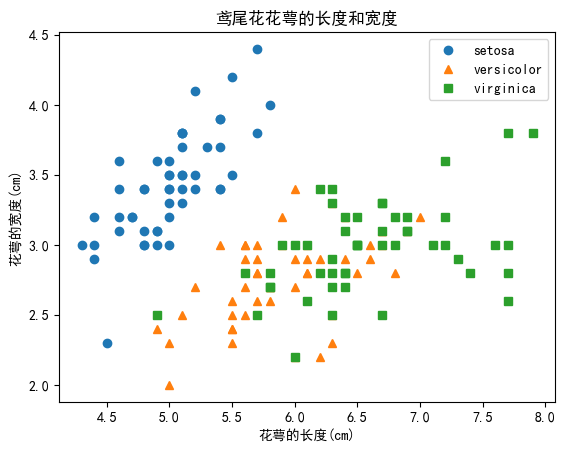

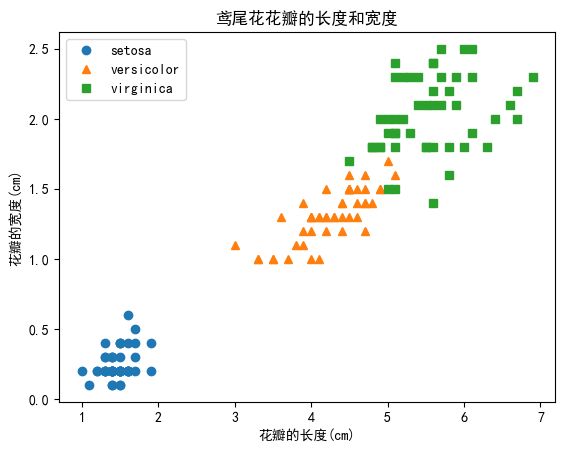

In [8]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris_datas = datasets.load_iris()
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
style_list = ['o', '^', 's']       # 设置点的不同形状，不同形状默认颜色不同，也可自定义
data = iris_datas.data
print(data.shape)
labels = iris_datas.target_names
print(labels)
"""
在普通的字典 dict 中,如果尝试访问一个不存在的键，将会引发一个 KeyError。然而,在 defaultdict 中，如果尝试访问一个不存在的键，它将自动为这个键创建一个默认值
"""
cc = defaultdict(list)
for i, d in enumerate(data):
    cc[labels[int(i/50)]].append(d) 
for each in [0, 2]:
    plt.figure()  # 开始新的图形
    for i, ds in enumerate(cc.values()):
        draw_data = np.array(ds)
        plt.plot(draw_data[:, each], draw_data[:, each + 1], style_list[i])
    
    plt.title('鸢尾花' + ('花瓣' if each else '花萼') + '的长度和宽度')
    plt.xlabel(('花瓣' if each else '花萼') + '的长度(cm)')
    plt.ylabel(('花瓣' if each else '花萼') + '的宽度(cm)')
    plt.legend(labels)
    plt.show()

##### 偏度、峰度

In [9]:
import pandas as pd
from pandas import set_option
iris=pd.read_csv('data/iris.csv')
# set_option('precision', 2) # 设置数据的精确度
pd.set_option('display.precision', 2)
numeric_iris = iris.select_dtypes(include=[np.number])
print(numeric_iris.skew()) # 偏度
print(numeric_iris.kurt()) # 峰度 

sepal_length    0.31
sepal_width     0.32
petal_length   -0.27
petal_width    -0.10
dtype: float64
sepal_length   -0.55
sepal_width     0.23
petal_length   -1.40
petal_width    -1.34
dtype: float64


##### 曲线图

密度估计图（也称为核密度估计图）

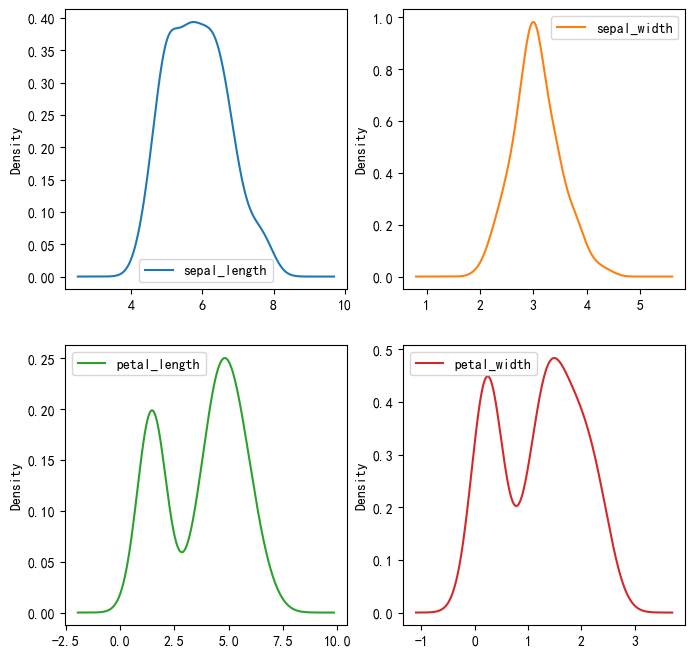

In [10]:
iris.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(8, 8))
plt.show()

特征直方图

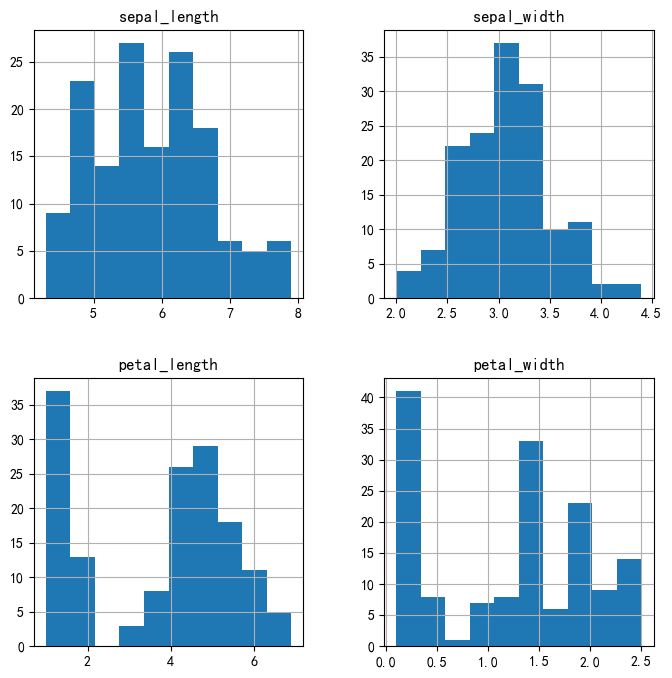

In [11]:
iris.hist(figsize=(8, 8))
plt.show()

#### 对比分析

但注意分组的合适性，以及对比的数值都是哪一些，是否合适

##### 条形图

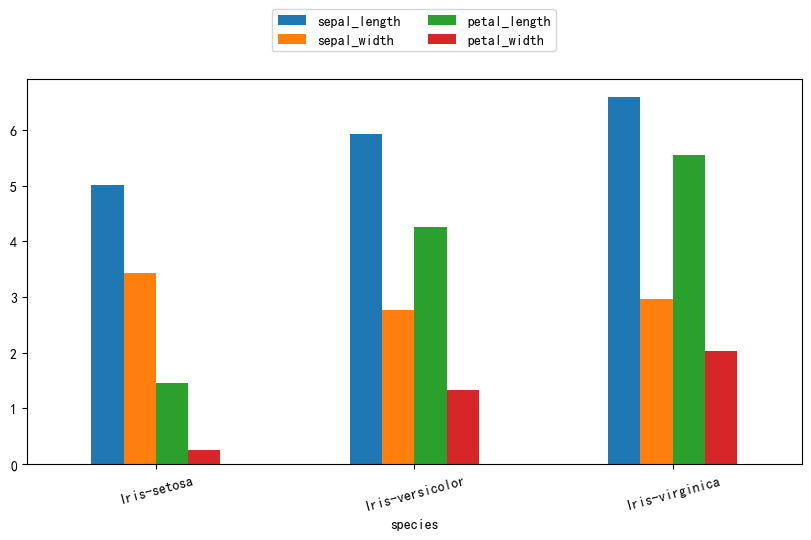

In [12]:
import pandas as pd
from pandas import set_option

iris_data = pd.read_csv("data/iris.csv")
grouped_data = iris_data.groupby("species")
grouped_data_mean = grouped_data.mean()
grouped_data_mean.plot(kind="bar", rot=15, figsize=(10, 5))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.show()

##### 水平条形图

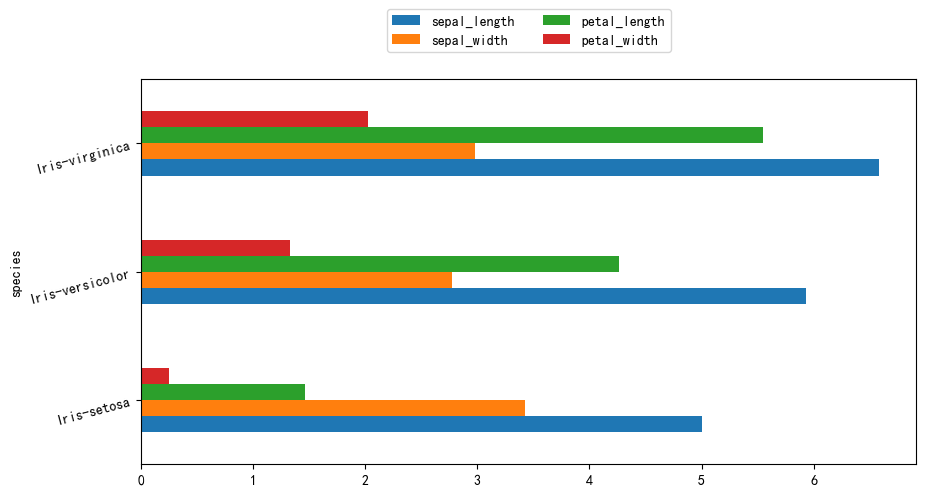

In [13]:
import pandas as pd
from pandas import set_option

iris_data = pd.read_csv("data/iris.csv")
grouped_data = iris_data.groupby("species")
grouped_data_mean = grouped_data.mean()
grouped_data_mean.plot(kind="barh", rot=15, figsize=(10, 5))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.show()

##### 折线图

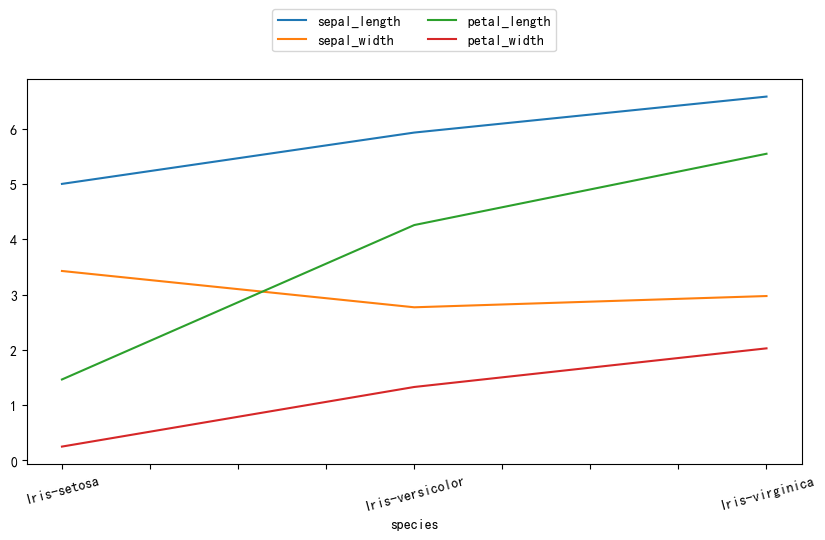

In [14]:
import pandas as pd
from pandas import set_option

iris_data = pd.read_csv("data/iris.csv")
grouped_data = iris_data.groupby("species")
grouped_data_mean = grouped_data.mean()
grouped_data_mean.plot(kind="line", rot=15, figsize=(10, 5))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.show()

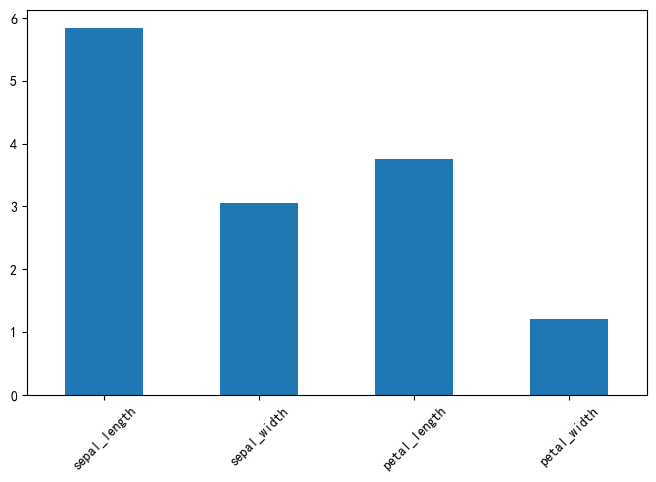

In [15]:
iris_mean = iris_data.select_dtypes(include=[np.number]).mean()
iris_mean.plot(kind="bar", rot=45, figsize=(8, 5))
plt.show()

#### 相关性分析

皮尔森相关性

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

其中：
- $x_i$ 和 $y_i$ 是两个变量的值，
- $\bar{x}$ 和 $\bar{y}$ 是两个变量的均值。

皮尔森相关系数假定两个变量是连续的，并且呈线性关系。如果两个变量之间不是线性关系，则皮尔森相关系数可能无法准确反映它们的关联程度。

- **1**：完全正相关，意味着一个变量增大时，另一个变量也以线性方式增大。
- **-1**：完全负相关，意味着一个变量增大时，另一个变量以线性方式减小。
- **0**：无相关，表示变量之间没有线性关系。

In [16]:
import pandas as pd
from pandas import set_option

iris = pd.read_csv("data/iris.csv")
set_option("display.precision", 2)  # 设置数据的精确度
iris.select_dtypes(include=[np.number]).corr(method="pearson")  # 皮尔森相关性

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


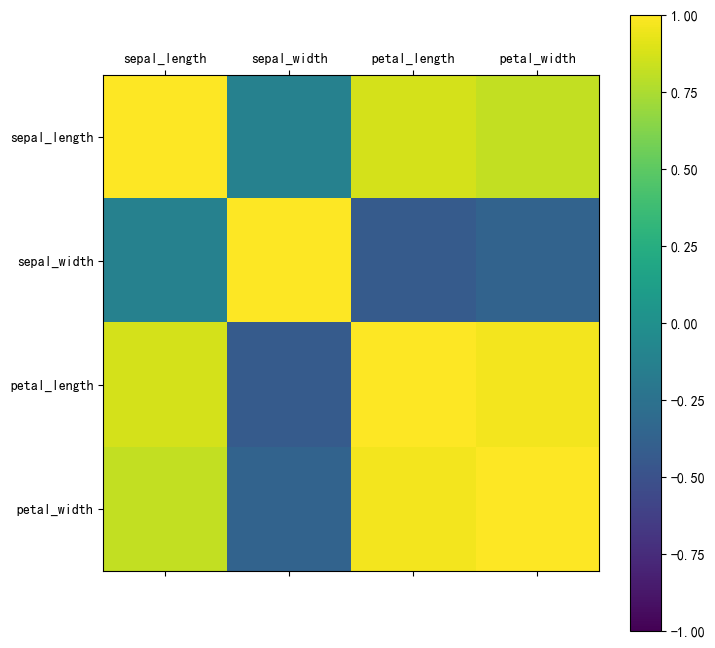

In [17]:
correlations = iris.select_dtypes(include=[np.number]).corr(method="pearson")
names = correlations.columns.tolist()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)  # 111表示图形是1行1列，并且这是第1个（也是唯一的）子图。
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()